In [1]:
# Get the dataset
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
# Unzip the data
!unzip train.zip?dl=0

--2023-06-12 11:36:08--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2023-06-12 11:36:08--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca0770d416a15afe06d3d6765e5.dl.dropboxusercontent.com/cd/0/inline/B90KQjVEQ-4Nfgkx3OcRv1Ohhlms7WG-Ok3qZoFzAk_L53WE5gphurC23ToTQq5qmTJzHNsfw926rUkzs04h7KpcQ8DmJoTEMaZv-4OTPPU84PyGsbhZ7fyBAtkjql_mqDz8jzyuKhKxPxqpY0omjVOhg-ZCq-4fuqVRe-ZwoltZdg/file# [following]
--2023-06-12 11:36:08--  https://uca0770d416a15afe06d3d6765e5.dl.dropboxusercontent.com/cd/0/inline/B90KQjVEQ-4Nfgkx3OcRv1Ohhlms7WG-Ok3qZoFzAk_L53WE5gphurC23ToTQq5qmTJzHNsfw926rUkzs04h

In [5]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
# MobileNet is a pretrained model
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img



 <h2><b> Building our Model to train the data</b> </h2> 

In [9]:
# Working on the pretrained model
# industry standard value is 224,224,3 and were using the pretrained moblilenet model and to that we'll give the input and include_top all these are the wirghts
base_model = MobileNet(input_shape=(224,224,3), include_top=False) # weights

for layer in base_model.layers: # To prevent retraining 
  layer.trainable = False # in order to make trainability for every layer to be false

# Now we will have to activate the softmax layer 
x = Flatten()(base_model.output)
x = Dense(units=7, activation = 'softmax')(x)
# '''
# Here, base_model.output refers to the output tensor of the pre-trained model. 
# The Flatten() layer is applied to this output tensor. 
# The Flatten() layer reshapes the tensor into a 1-dimensional vector, effectively flattening the multi-dimensional output into a single long vector. 
# This allows the subsequent layers to process the data.
# The result of the Flatten() operation is assigned to the variable x. This variable will hold the flattened output tensor for further processing.


# In this line, a Dense layer is added on top of the previous layer (x) obtained from the Flatten() operation. 
# The Dense layer is a fully connected neural network layer, where each neuron is connected to every neuron in the previous layer.

# The units parameter is set to 7, which means the Dense layer will have 7 neurons. 
# The number of units/neurons in this layer can be adjusted based on the specific task or problem at hand.

# The activation parameter is set to 'softmax'. 
# This means that the output of the Dense layer will be transformed using the softmax activation function. 
# The softmax function is commonly used in multi-class classification problems to produce a probability distribution over the classes. 
# It ensures that the output values are non-negative and sum up to 1, representing the predicted probabilities for each class.

# Overall, these lines of code connect the flattened output of the pre-trained model to a fully connected (Dense) layer with 7 units,
# using the softmax activation function to obtain the final predictions for a specific classification task.
# '''

model = Model(base_model.input,x)



17225924/17225924 [==============================] - 0s 0us/step


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [11]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


<h2><b> Preparing our data using the Data Generator</b></h2>

In [15]:
train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
train_data = train_datagen.flow_from_directory(directory = '/content/train',
                                               target_size = (224,224),
                                               batch_size = 32)
# batch size tells how many times you run the cycle
train_data.class_indices



Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [18]:

# Following is the output we get:
# Found 350 images belonging to 7 classes.
# {'Angry': 0,
#  'Disguist': 1,
#  'Fear': 2,
#  'Happy': 3,
#  'Neutral': 4,
#  'Sad': 5,
#  'Surprise': 6}
#  seven dense layers so 7 emotions



In [19]:
# Validate the model
val_datagen = ImageDataGenerator(rescale= 1/255)
val_data = val_datagen.flow_from_directory(directory='/content/train',
                                           target_size=(244,244),
                                           batch_size = 32
                                           )


Found 350 images belonging to 7 classes.


<h2><b>Visualizing the data that is fed to train data gen </b></h2>

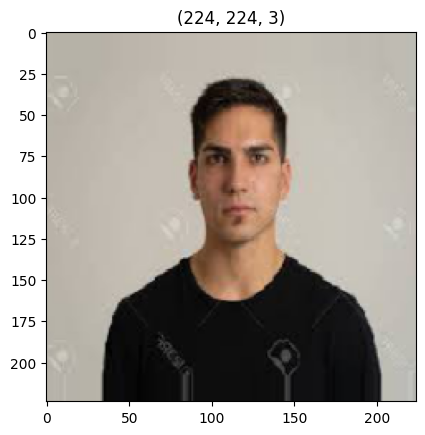

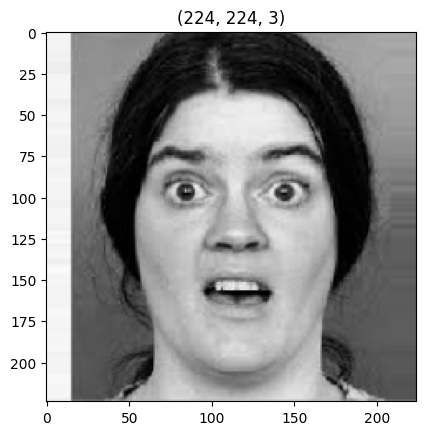

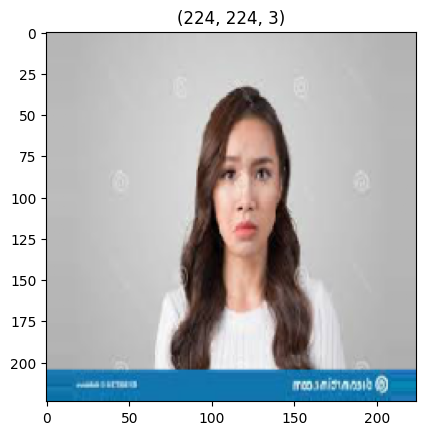

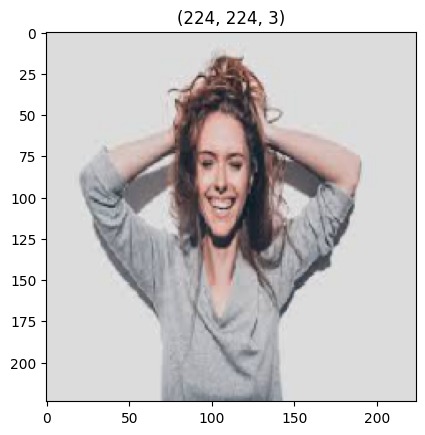

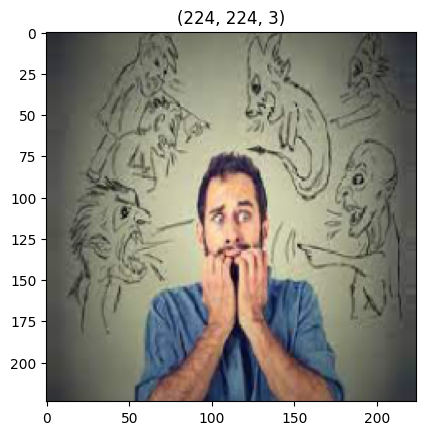

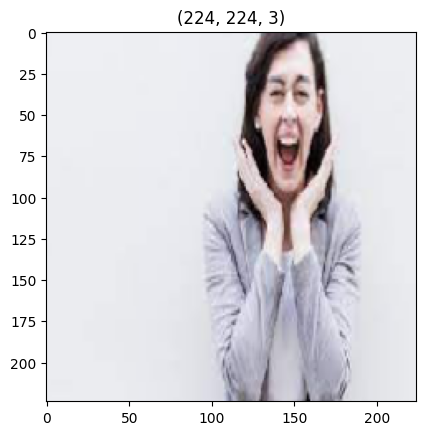

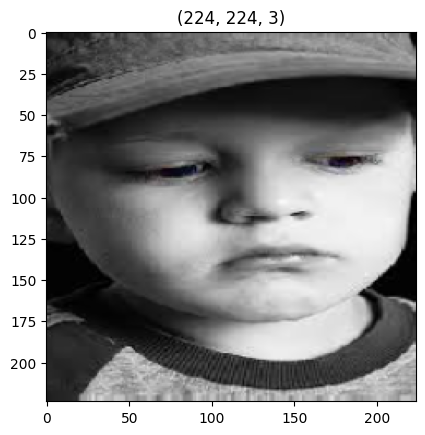

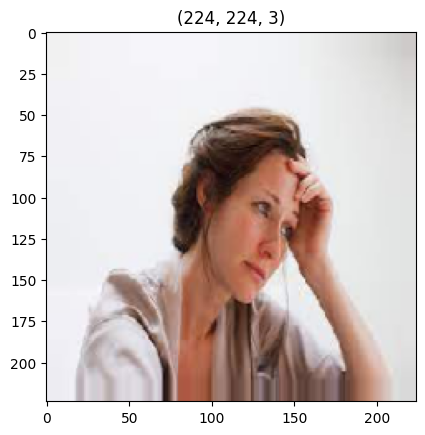

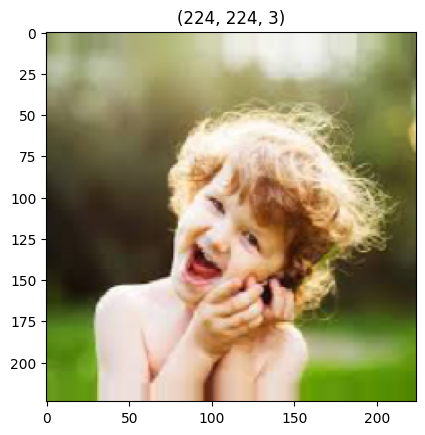

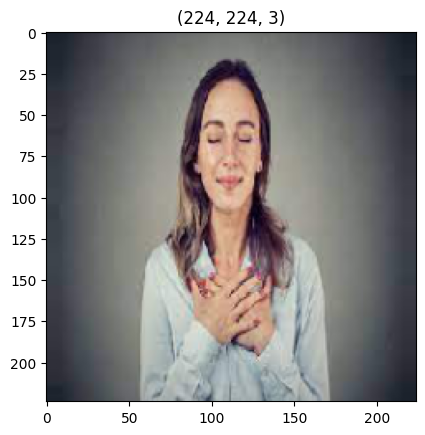

In [20]:
t_img, label = train_data.next()
# Function when called will plot the images
def plotImages(img_arr, label):
  # input: images array
  # output: plots the images
  count=0
  for im,l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count+=1
    if(count==10):
      break

# Function call to plot the images
plotImages(t_img,label)

<h2><b>Having early stopping and model checkpointing</b></h2>

In [22]:
# Having early stopping and model checkpointing 
from keras.callbacks import ModelCheckpoint, EarlyStopping
# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# model checkpointing
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# putting callback in a list
call_back = [es,mc]

In [23]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data= val_data,
                           validation_freq=8,
                           callbacks=[es,mc]
                           )

<ipython-input-23-dc8973fd5886>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 12.6382 - accuracy: 0.2075

10/10 [==============================] - 13s 1s/step - loss: 12.6382 - accuracy: 0.2075
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.8967 - accuracy: 0.5503

10/10 [==============================] - 11s 1s/step - loss: 3.8967 - accuracy: 0.5503
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.8953 - accuracy: 0.7075

10/10 [==============================] - 11s 1s/step - loss: 1.8953 - accuracy: 0.7075
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.0672 - accuracy: 0.8113

10/10 [==============================] - 12s 1s/step - loss: 1.0672 - accuracy: 0.8113
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.7516 - accuracy: 0.8459

10/10 [==============================] - 11s 1s/step - loss: 0.7516 - accuracy: 0.8459
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.9119

10/10 [==============================] - 10s 1s/step - loss: 0.5904 - accuracy: 0.9119
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.5444 - accuracy: 0.9088

10/10 [==============================] - 11s 1s/step - loss: 0.5444 - accuracy: 0.9088
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9623
Epoch 8: val_accuracy improved from -inf to 0.93429, saving model to best_model.h5
10/10 [==============================] - 23s 2s/step - loss: 0.1206 - accuracy: 0.9623 - val_loss: 0.2530 - val_accuracy: 0.9343
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9688

10/10 [==============================] - 11s 1s/step - loss: 0.0840 - accuracy: 0.9688
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.1201 - accuracy: 0.9623

10/10 [==============================] - 10s 979ms/step - loss: 0.1201 - accuracy: 0.9623
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9844

10/10 [==============================] - 11s 983ms/step - loss: 0.0502 - accuracy: 0.9844
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 0.0558 - accuracy: 0.9874

10/10 [==============================] - 11s 1s/step - loss: 0.0558 - accuracy: 0.9874
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9906

10/10 [==============================] - 11s 1s/step - loss: 0.0401 - accuracy: 0.9906
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9874

10/10 [==============================] - 11s 1s/step - loss: 0.0551 - accuracy: 0.9874
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9875

10/10 [==============================] - 11s 1000ms/step - loss: 0.0245 - accuracy: 0.9875
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9875
Epoch 16: val_accuracy improved from 0.93429 to 0.96857, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.0827 - accuracy: 0.9875 - val_loss: 0.1684 - val_accuracy: 0.9686
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9906

10/10 [==============================] - 11s 1s/step - loss: 0.0229 - accuracy: 0.9906
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9906

10/10 [==============================] - 11s 1s/step - loss: 0.0332 - accuracy: 0.9906
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9906

10/10 [==============================] - 11s 981ms/step - loss: 0.0131 - accuracy: 0.9906
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 0.0372 - accuracy: 0.9906

10/10 [==============================] - 11s 1s/step - loss: 0.0372 - accuracy: 0.9906
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9843

10/10 [==============================] - 11s 1s/step - loss: 0.0521 - accuracy: 0.9843
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9843

10/10 [==============================] - 11s 1s/step - loss: 0.0404 - accuracy: 0.9843
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9812

10/10 [==============================] - 11s 1s/step - loss: 0.0645 - accuracy: 0.9812
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 0.1244 - accuracy: 0.9623
Epoch 24: val_accuracy did not improve from 0.96857
10/10 [==============================] - 21s 2s/step - loss: 0.1244 - accuracy: 0.9623 - val_loss: 0.7576 - val_accuracy: 0.8657
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 0.0959 - accuracy: 0.9654

10/10 [==============================] - 11s 1s/step - loss: 0.0959 - accuracy: 0.9654
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9686

10/10 [==============================] - 11s 1s/step - loss: 0.0721 - accuracy: 0.9686
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 0.0847 - accuracy: 0.9811

10/10 [==============================] - 11s 1s/step - loss: 0.0847 - accuracy: 0.9811
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000

10/10 [==============================] - 10s 1000ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9874

10/10 [==============================] - 11s 996ms/step - loss: 0.0473 - accuracy: 0.9874
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9906

10/10 [==============================] - 11s 1s/step - loss: 0.0540 - accuracy: 0.9906


In [24]:
from keras.models import load_model
model = load_model('/content/best_model.h5')


In [27]:
h = hist.history
h.keys()




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

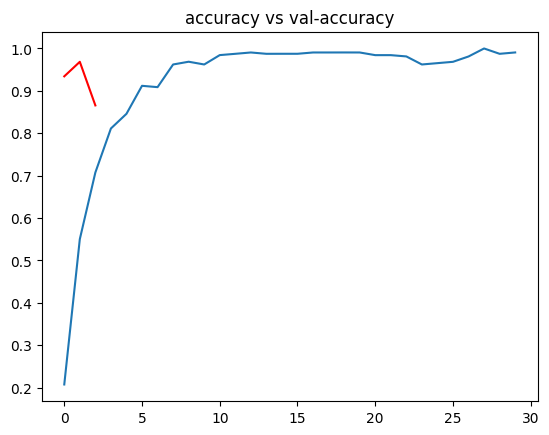

In [28]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('accuracy vs val-accuracy')
plt.show()

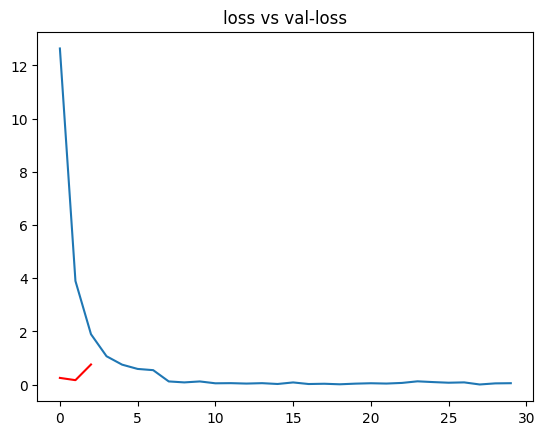

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs val-loss')
plt.show()

In [29]:
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys() ))

1/1 [==============================] - 0s 374ms/step
The image is of Happy


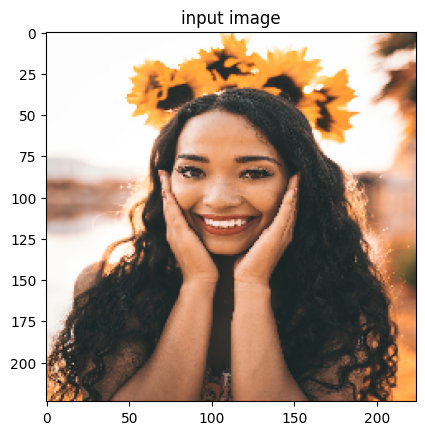

In [36]:
path = "/content/download.jpg"
img = load_img(path, target_size=(224,224))
i= img_to_array(img)/255
input_arr= np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
print(f"The image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()